# Module Importation, Data Importation, Cleaning and Preprocessing

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
from datetime import datetime
from sklearn.metrics import mean_absolute_error
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression, Ridge
from category_encoders import OneHotEncoder

In [2]:
#import excel file to notebook
df = pd.read_excel(r"C:\Users\USER\Downloads\Employee Agreement Data Assiignment\GTS_Assignment_batch_9\GTS-Employee_Agreement_09.xlsx")

In [3]:
df

,EmpID,FirstName,LastName,Name,Position,Department,Agreement_Date,ExitDate,Contract_Term (in months),Current Employee Rating,Basic Salary,Bonus,Benefits,cloud_service_used,database_software_required,statistic_software_required,programming_language_required,Tools_used
0,1002,Sandra,Martin,Sandra_Martin,Foreman,Software Engineering,2022-12-12,2023-05-28,5.566667,3,88916.80,0.00,3581.86,NaN,NaN,NaN,NaN,",,"
1,1003,Keyla,Del Bosque,Keyla_Del Bosque,Foreman,Software Engineering,2023-03-08,2023-03-15,0.233333,3,41854.40,0.00,2155.70,NaN,NaN,NaN,C/C++/C#/Objective-C,",,C/C++/C#/Objective-C"
2,1004,Andrew,Szabo,Andrew_Szabo,Coordinator,Software Engineering,2020-05-29,2021-03-05,9.333333,3,109230.40,4535.55,2640.83,NaN,NaN,NaN,Python,",,Python"
3,1006,Colby,Andreola,Colby_Andreola,Administrator,Software Engineering,2021-08-15,2021-11-20,3.233333,3,83230.56,0.00,0.00,NaN,NaN,NaN,C/C++/C#/Objective-C,",,C/C++/C#/Objective-C"
4,1007,Edward,True,Edward_TRUE,Lineman,Software Engineering,2020-10-25,2021-09-26,11.200000,3,70028.34,4837.33,2924.85,NoSQL,SQL,NaN,Ruby,"SQL,,Ruby"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,3991,Talan,Rodgers,NaN,Coordinator,IT/IS,2023-04-10,NaT,-1500.866667,3,35594.48,155.33,2625.00,NaN,NaN,NaN,NaN,",,"
2996,3993,Sienna,Preston,NaN,Foreman,IT/IS,2022-06-22,NaT,-1491.133333,3,20665.73,0.00,0.00,NaN,SQL,NaN,NaN,"SQL,,"
2997,3994,Taylor,Dennis,NaN,Top Hand,IT/IS,2022-09-22,NaT,-1494.200000,3,58445.60,0.00,0.00,NaN,NaN,NaN,NaN,",,"
2998,3996,Leonel,Combs,NaN,Laborer,IT/IS,2021-09-01,NaT,-1481.333333,3,60847.04,0.00,0.00,NaN,NaN,SPSS,NaN,",SPSS,"


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 18 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   EmpID                          3000 non-null   int64         
 1   FirstName                      3000 non-null   object        
 2   LastName                       3000 non-null   object        
 3   Name                           1533 non-null   object        
 4   Position                       3000 non-null   object        
 5   Department                     3000 non-null   object        
 6    Agreement_Date                3000 non-null   datetime64[ns]
 7   ExitDate                       1533 non-null   datetime64[ns]
 8   Contract_Term (in months)      3000 non-null   float64       
 9   Current Employee Rating        3000 non-null   int64         
 10  Basic Salary                   3000 non-null   float64       
 11  Bonus            

In [5]:
df.columns = df.columns.str.strip()

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 18 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   EmpID                          3000 non-null   int64         
 1   FirstName                      3000 non-null   object        
 2   LastName                       3000 non-null   object        
 3   Name                           1533 non-null   object        
 4   Position                       3000 non-null   object        
 5   Department                     3000 non-null   object        
 6   Agreement_Date                 3000 non-null   datetime64[ns]
 7   ExitDate                       1533 non-null   datetime64[ns]
 8   Contract_Term (in months)      3000 non-null   float64       
 9   Current Employee Rating        3000 non-null   int64         
 10  Basic Salary                   3000 non-null   float64       
 11  Bonus            

In [7]:
#Drop all empty rows in the dataset
df.dropna(inplace = True)

In [8]:
#Drop unwanted columns from the dataset
df.drop(columns = ["database_software_required", "statistic_software_required", "programming_language_required", "Current Employee Rating"], inplace = True)

In [9]:
#Round "Contract_Term (in months)" to two decimal places
df["Contract_Term (in months)"]=df["Contract_Term (in months)"].round(2)

In [10]:
#Remove more columns that are not needed
df.drop(columns = ["FirstName", "LastName", "ExitDate", "Agreement_Date"], inplace = True)

In [11]:
df["Tools_used"] = df["Tools_used"].str.replace("/", ",")
df.rename(columns = {"Basic Salary":"Basic_Salary"}, inplace = True )

In [12]:
# df.rename(columns = {"Agreement_Date":"Agreement_Date_"}, inplace = True )

In [13]:
df

,EmpID,Name,Position,Department,Contract_Term (in months),Basic_Salary,Bonus,Benefits,cloud_service_used,Tools_used
8,1011,Sarah_Malone,Foreman,Software Engineering,12.33,33143.84,565.02,19.80,Azure,"SQL,R,Python"
22,1028,Joseph_Schmidt,Model Assistant,Software Engineering,39.13,85329.79,46655.78,2979.33,MapReduce,"SQL,SAS,Python"
29,1043,Kale_Lang,Billing Officer,Software Engineering,4.73,7568.63,0.00,1.20,Azure,"SQL,SAS,Java,Javascript"
41,1070,Karla_Reed,Project Manager,Software Engineering,42.00,50144.32,0.00,0.00,AWS,"mySQL,STATA,Python"
42,1071,Yadira_Mcmillan,Laborer,Software Engineering,18.97,50124.80,0.00,1446.34,GCP,"SQL,STATA,Python"
...,...,...,...,...,...,...,...,...,...,...
1501,3928,Audrina_Yu,Laborer,IT/IS,8.80,38261.12,0.00,0.00,MapReduce,"SQL,SAS,Ruby"
1502,3929,Jeramiah_Foster,Clerk,IT/IS,1.20,49396.51,14732.74,678.39,GCP,"SQL,R,Python"
1505,3942,Bianca_Roehrich,Laborer,IT/IS,38.13,831.60,0.00,0.00,AWS,"SQL,SAS,Python"
1507,3947,Renee_Becker,Field Technician,IT/IS,26.97,75755.20,6665.73,7850.78,AWS,"SQL,SPSS,Python"


# Exploratory Data Analysis

In [14]:
df.info

<bound method DataFrame.info of       EmpID             Name          Position            Department  \
8      1011     Sarah_Malone           Foreman  Software Engineering   
22     1028   Joseph_Schmidt   Model Assistant  Software Engineering   
29     1043        Kale_Lang   Billing Officer  Software Engineering   
41     1070       Karla_Reed   Project Manager  Software Engineering   
42     1071  Yadira_Mcmillan           Laborer  Software Engineering   
...     ...              ...               ...                   ...   
1501   3928       Audrina_Yu           Laborer                 IT/IS   
1502   3929  Jeramiah_Foster             Clerk                 IT/IS   
1505   3942  Bianca_Roehrich           Laborer                 IT/IS   
1507   3947     Renee_Becker  Field Technician                 IT/IS   
1512   3956      Aliana_Shaw           Foreman                 IT/IS   

      Contract_Term (in months)  Basic_Salary     Bonus  Benefits  \
8                         12.33   

In [15]:
df.describe()

,EmpID,Contract_Term (in months),Basic_Salary,Bonus,Benefits
count,238.000000,238.000000,238.000000,238.000000,238.000000
mean,2497.705882,17.484664,55944.319328,5598.844370,3019.085168
std,860.278606,13.354929,29862.578892,13296.545116,4720.033331
min,1011.000000,0.130000,0.000000,0.000000,0.000000
25%,1743.250000,6.740000,38370.682500,0.000000,10.112500
50%,2496.500000,14.665000,54068.400000,270.765000,1611.500000
75%,3290.250000,25.382500,75755.200000,3693.827500,3602.700000
max,3956.000000,58.600000,177697.600000,78099.400000,34471.580000


In [16]:
# df["salaries"] = df.iloc["Basic_Salary" , "Bonus", "Benefits"]
df["salaries"] = df.loc[:,"Basic_Salary":"Benefits"].sum(axis = "columns")

In [17]:
df["salaries"]

8        33728.66
22      134964.90
29        7569.83
41       50144.32
42       51571.14
          ...    
1501     38261.12
1502     64807.64
1505       831.60
1507     90271.71
1512     46408.72
Name: salaries, Length: 238, dtype: float64

In [18]:
# Unique Departments in the Company

df["Department"].value_counts()

Department
Production              169
IT/IS                    28
Sales                    19
Software Engineering     12
Admin Offices             9
Executive Office          1
Name: count, dtype: int64

In [19]:
#Basic Salary ranges and how many staff receiving the stated amounts
df["Basic_Salary"].value_counts()

Basic_Salary
75755.20    18
84582.40     3
46384.00     3
93542.40     3
51798.40     3
            ..
72803.20     1
35808.80     1
14830.34     1
54188.00     1
45396.80     1
Name: count, Length: 201, dtype: int64

In [20]:
#Bonus ranges and how many staff receiving the stated amounts
df["Bonus"].value_counts()

Bonus
0.00        103
113.70        2
288.08        2
8683.92       1
360.56        1
           ... 
49864.68      1
3797.77       1
660.28        1
4185.87       1
6665.73       1
Name: count, Length: 134, dtype: int64

In [21]:
#Benefits ranges and how many staff receiving the stated amounts
df["Benefits"].value_counts()

Benefits
0.00       55
1446.34     3
129.75      3
2979.33     2
1638.60     2
           ..
3000.00     1
4680.00     1
184.50      1
3514.88     1
1011.92     1
Name: count, Length: 177, dtype: int64

<Axes: title={'center': 'Comparing Basic Salaries of First Ten Employees'}, xlabel='First Ten Employees', ylabel='Basic Salary'>

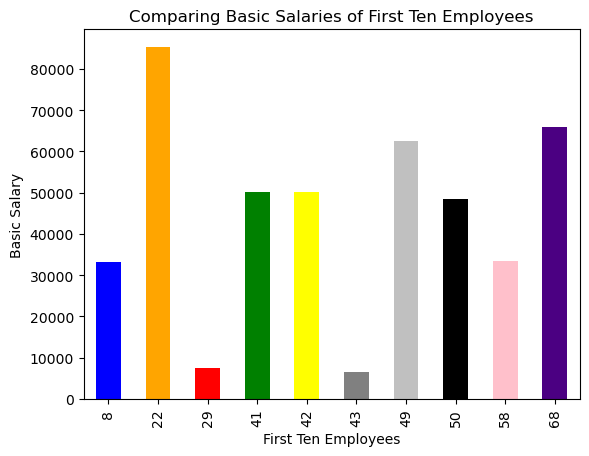

In [22]:
#Basic Salary of first ten employees
df["Basic_Salary"][:10].plot(
        kind = "bar",
        xlabel = "First Ten Employees",
        ylabel = "Basic Salary",
        title = "Comparing Basic Salaries of First Ten Employees",
        color = ("blue", "orange", "red", "green", "yellow", "grey", "silver", "black", "pink", "indigo")
    )


Text(0.5, 1.0, 'Distribution of Basic_Salaries')

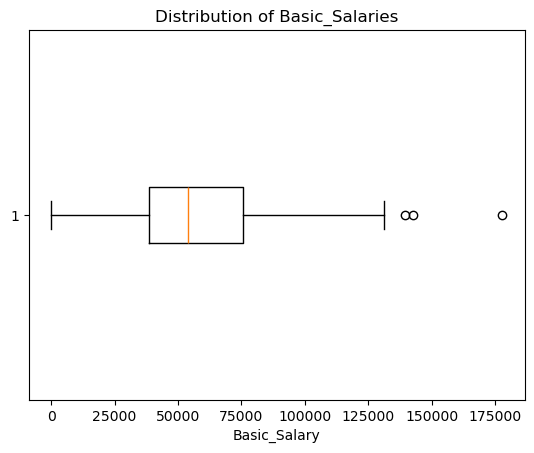

In [23]:
# df["Basic_Salary"].plot(
#         kind ="bar",
#         xlabel ="Department",
#         ylabel ="Basic_Salary",
#         title = "Department vs. Basic Salary"
#     )
plt.boxplot(df["Basic_Salary"], vert = 0)
plt.xlabel("Basic_Salary")
plt.title("Distribution of Basic_Salaries")

Text(0.5, 1.0, 'Distribution of Bonuses')

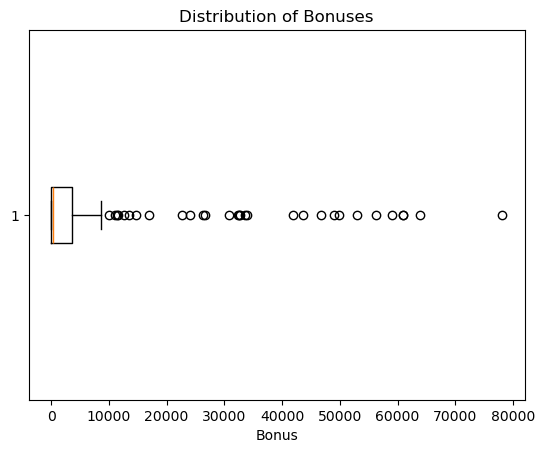

In [24]:
plt.boxplot(df["Bonus"], vert = 0)
plt.xlabel("Bonus")  # Setting the label for the y-axis
plt.title("Distribution of Bonuses")  # Setting the title of the plot

Text(0, 0.5, 'Frequency')

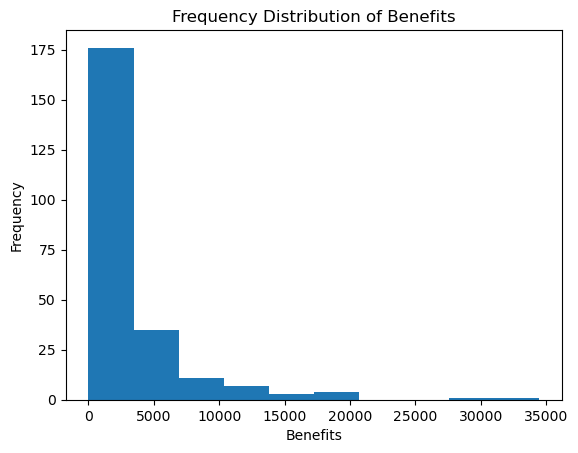

In [25]:
plt.hist( df["Benefits"])

plt.title("Frequency Distribution of Benefits")

plt.xlabel("Benefits")
plt.ylabel("Frequency")

# plt.show()

Text(0.5, 1.0, 'Frequency Distribution of Basic_Salary')

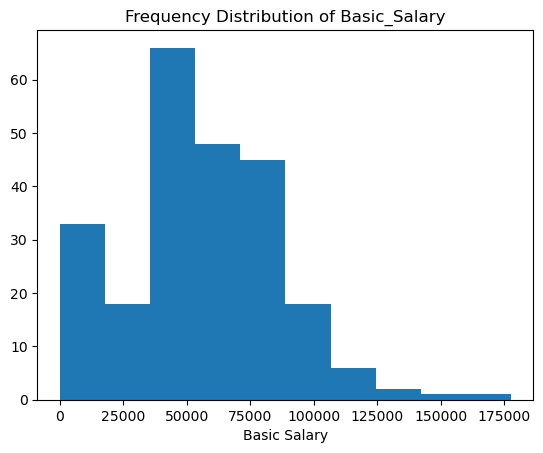

In [26]:
plt.hist(df["Basic_Salary"])
plt.xlabel("Basic Salary")
plt.title("Frequency Distribution of Basic_Salary")

# Analysing Cloud_Software and Tools used

In [27]:
# Split the 'Tools_used' column into separate columns based on ","
df["Tools_used"] = df['Tools_used'].apply(lambda x: x.split(','))
# df["Tools_used"]

In [28]:
#Get all unique tools
unique_tools = set(tool for sublist in df['Tools_used'] for tool in sublist if tool != '')

# Create new columns for each unique tool and initialize with 0
for tool in unique_tools:
    df[tool] = 0

# Populate the new columns with 1 where the tool is present
for index, row in df.iterrows():
    for tool in row['Tools_used']:
        if tool != '':
            df.at[index, tool] = 1

# Drop the original 'Tools_used' column if no longer needed
df.drop(columns=['Tools_used'], inplace=True)

# Display the modified DataFrame
print(df)

      EmpID             Name          Position            Department  \
8      1011     Sarah_Malone           Foreman  Software Engineering   
22     1028   Joseph_Schmidt   Model Assistant  Software Engineering   
29     1043        Kale_Lang   Billing Officer  Software Engineering   
41     1070       Karla_Reed   Project Manager  Software Engineering   
42     1071  Yadira_Mcmillan           Laborer  Software Engineering   
...     ...              ...               ...                   ...   
1501   3928       Audrina_Yu           Laborer                 IT/IS   
1502   3929  Jeramiah_Foster             Clerk                 IT/IS   
1505   3942  Bianca_Roehrich           Laborer                 IT/IS   
1507   3947     Renee_Becker  Field Technician                 IT/IS   
1512   3956      Aliana_Shaw           Foreman                 IT/IS   

      Contract_Term (in months)  Basic_Salary     Bonus  Benefits  \
8                         12.33      33143.84    565.02     19.80 

In [29]:
 New_Employee_Data = df

In [30]:
New_Employee_Data

,EmpID,Name,Position,Department,Contract_Term (in months),Basic_Salary,Bonus,Benefits,cloud_service_used,salaries,...,Python,STATA,Oracle,SPSS,Javascript,Ruby,Objective-C,C#,R,C
8,1011,Sarah_Malone,Foreman,Software Engineering,12.33,33143.84,565.02,19.80,Azure,33728.66,...,1,0,0,0,0,0,0,0,1,0
22,1028,Joseph_Schmidt,Model Assistant,Software Engineering,39.13,85329.79,46655.78,2979.33,MapReduce,134964.90,...,1,0,0,0,0,0,0,0,0,0
29,1043,Kale_Lang,Billing Officer,Software Engineering,4.73,7568.63,0.00,1.20,Azure,7569.83,...,0,0,0,0,1,0,0,0,0,0
41,1070,Karla_Reed,Project Manager,Software Engineering,42.00,50144.32,0.00,0.00,AWS,50144.32,...,1,1,0,0,0,0,0,0,0,0
42,1071,Yadira_Mcmillan,Laborer,Software Engineering,18.97,50124.80,0.00,1446.34,GCP,51571.14,...,1,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1501,3928,Audrina_Yu,Laborer,IT/IS,8.80,38261.12,0.00,0.00,MapReduce,38261.12,...,0,0,0,0,0,1,0,0,0,0
1502,3929,Jeramiah_Foster,Clerk,IT/IS,1.20,49396.51,14732.74,678.39,GCP,64807.64,...,1,0,0,0,0,0,0,0,1,0
1505,3942,Bianca_Roehrich,Laborer,IT/IS,38.13,831.60,0.00,0.00,AWS,831.60,...,1,0,0,0,0,0,0,0,0,0
1507,3947,Renee_Becker,Field Technician,IT/IS,26.97,75755.20,6665.73,7850.78,AWS,90271.71,...,1,0,0,1,0,0,0,0,0,0


In [31]:
# df.to_csv(r"C:\Users\USER\Downloads\Employee Agreement Data Assiignment\GTS_Assignment_batch_9\New_Employee_Data",sep='\t',encoding='utf-8', index = False)

In [32]:
df.drop(columns = ["EmpID","Position", "Department", "Contract_Term (in months)", "Basic_Salary", "Bonus","Benefits", "salaries"], inplace = True)

In [33]:
df

,Name,cloud_service_used,SAS,Teradata,Java,SQL,C++,mySQL,Python,STATA,Oracle,SPSS,Javascript,Ruby,Objective-C,C#,R,C
8,Sarah_Malone,Azure,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0
22,Joseph_Schmidt,MapReduce,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0
29,Kale_Lang,Azure,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0
41,Karla_Reed,AWS,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0
42,Yadira_Mcmillan,GCP,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1501,Audrina_Yu,MapReduce,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
1502,Jeramiah_Foster,GCP,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0
1505,Bianca_Roehrich,AWS,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0
1507,Renee_Becker,AWS,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0


In [34]:
#Checking how many employees use each tool

df_sum = df.sum(axis ="rows", skipna=True, numeric_only = True)
df_sum.sort_values(ascending = False)

SQL            204
Python         196
R               98
SAS             81
SPSS            41
Ruby            32
mySQL           29
STATA           18
Java             5
C++              5
Javascript       5
Objective-C      5
C#               5
C                5
Teradata         4
Oracle           1
dtype: int64

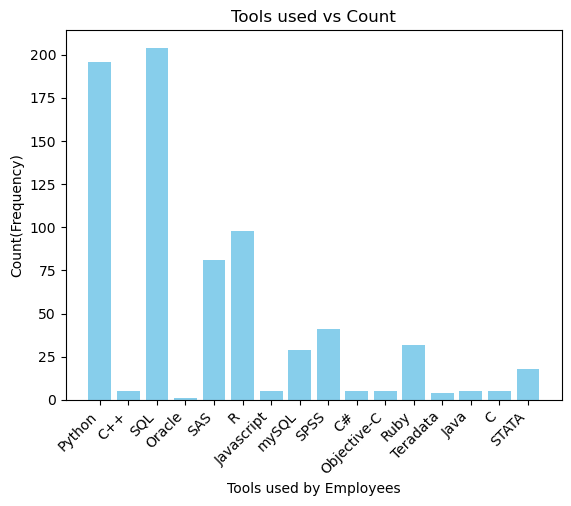

In [35]:
Tools_used = ['Python', 'C++', 'SQL', 'Oracle', 'SAS', 'R', 'Javascript', 'mySQL', 'SPSS',
             'C#', 'Objective-C', 'Ruby', 'Teradata', 'Java', 'C', 'STATA']
counts = [196, 5, 204, 1, 81, 98, 5, 29, 41, 5, 5, 32, 4, 5, 5, 18]

# Create a bar chart of Tools used vs, Howmany employees use those tools

plt.bar(Tools_used, counts, color='skyblue')
plt.xlabel('Tools used by Employees')
plt.ylabel('Count(Frequency)')
plt.title('Tools used vs Count')
plt.xticks(rotation=45, ha='right')
plt.grid(False, axis='y')

In [36]:
# Unique Cloud Services used

df["cloud_service_used"].unique()

array(['Azure', 'MapReduce', 'AWS', 'GCP', 'NoSQL'], dtype=object)

In [37]:
 df["cloud_service_used"].value_counts()
#     (axis ="rows", skipna=True, numeric_only = True)

cloud_service_used
AWS          72
Azure        54
GCP          43
NoSQL        39
MapReduce    30
Name: count, dtype: int64

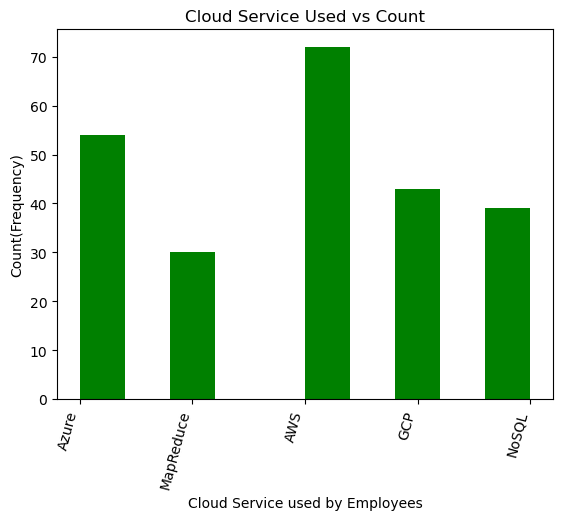

In [38]:
# Create a bar chart of Tools used vs, Howmany employees use those tools

plt.hist(df["cloud_service_used"], color='green')
plt.xlabel('Cloud Service used by Employees')
plt.ylabel('Count(Frequency)')
plt.title('Cloud Service Used vs Count')
plt.xticks(rotation=75, ha='right')
plt.grid(False, axis='y')

# ADVANCED ANALYSIS

In [39]:
df=pd.read_csv(r"C:\Users\USER\Downloads\Employee Agreement Data Assiignment\GTS_Assignment_batch_9\New_Employee_Data",sep='\t',encoding='utf-8')

In [40]:
df.describe()

,EmpID,Contract_Term (in months),Basic_Salary,Bonus,Benefits,salaries,C#,Oracle,R,Objective-C,...,STATA,SPSS,SAS,SQL,mySQL,Java,Javascript,Ruby,C++,Python
count,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,...,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000
mean,2497.705882,17.484664,55944.319328,5598.844370,3019.085168,64562.248866,0.021008,0.004202,0.411765,0.021008,...,0.075630,0.172269,0.340336,0.857143,0.121849,0.021008,0.021008,0.134454,0.021008,0.823529
std,860.278606,13.354929,29862.578892,13296.545116,4720.033331,38615.207753,0.143714,0.064820,0.493190,0.143714,...,0.264963,0.378410,0.474821,0.350665,0.327800,0.143714,0.143714,0.341858,0.143714,0.382023
min,1011.000000,0.130000,0.000000,0.000000,0.000000,89.080000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1743.250000,6.740000,38370.682500,0.000000,10.112500,41042.002500,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,2496.500000,14.665000,54068.400000,270.765000,1611.500000,59501.210000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,3290.250000,25.382500,75755.200000,3693.827500,3602.700000,84162.080000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,3956.000000,58.600000,177697.600000,78099.400000,34471.580000,211041.220000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [41]:
# datetime_cols = df.select_dtypes(include=['datetime64']).columns

In [42]:
df

,EmpID,Name,Position,Department,Contract_Term (in months),Basic_Salary,Bonus,Benefits,cloud_service_used,salaries,...,STATA,SPSS,SAS,SQL,mySQL,Java,Javascript,Ruby,C++,Python
0,1011,Sarah_Malone,Foreman,Software Engineering,12.33,33143.84,565.02,19.80,Azure,33728.66,...,0,0,0,1,0,0,0,0,0,1
1,1028,Joseph_Schmidt,Model Assistant,Software Engineering,39.13,85329.79,46655.78,2979.33,MapReduce,134964.90,...,0,0,1,1,0,0,0,0,0,1
2,1043,Kale_Lang,Billing Officer,Software Engineering,4.73,7568.63,0.00,1.20,Azure,7569.83,...,0,0,1,1,0,1,1,0,0,0
3,1070,Karla_Reed,Project Manager,Software Engineering,42.00,50144.32,0.00,0.00,AWS,50144.32,...,1,0,0,0,1,0,0,0,0,1
4,1071,Yadira_Mcmillan,Laborer,Software Engineering,18.97,50124.80,0.00,1446.34,GCP,51571.14,...,1,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233,3928,Audrina_Yu,Laborer,IT/IS,8.80,38261.12,0.00,0.00,MapReduce,38261.12,...,0,0,1,1,0,0,0,1,0,0
234,3929,Jeramiah_Foster,Clerk,IT/IS,1.20,49396.51,14732.74,678.39,GCP,64807.64,...,0,0,0,1,0,0,0,0,0,1
235,3942,Bianca_Roehrich,Laborer,IT/IS,38.13,831.60,0.00,0.00,AWS,831.60,...,0,0,1,1,0,0,0,0,0,1
236,3947,Renee_Becker,Field Technician,IT/IS,26.97,75755.20,6665.73,7850.78,AWS,90271.71,...,0,1,0,1,0,0,0,0,0,1


In [43]:
# Drop columns with all tools
df.drop(columns = ["Teradata","STATA","R","C#","Ruby","Javascript","Oracle","SPSS","mySQL","C","SAS","Java","SQL","Python","C++","Objective-C"])

,EmpID,Name,Position,Department,Contract_Term (in months),Basic_Salary,Bonus,Benefits,cloud_service_used,salaries
0,1011,Sarah_Malone,Foreman,Software Engineering,12.33,33143.84,565.02,19.80,Azure,33728.66
1,1028,Joseph_Schmidt,Model Assistant,Software Engineering,39.13,85329.79,46655.78,2979.33,MapReduce,134964.90
2,1043,Kale_Lang,Billing Officer,Software Engineering,4.73,7568.63,0.00,1.20,Azure,7569.83
3,1070,Karla_Reed,Project Manager,Software Engineering,42.00,50144.32,0.00,0.00,AWS,50144.32
4,1071,Yadira_Mcmillan,Laborer,Software Engineering,18.97,50124.80,0.00,1446.34,GCP,51571.14
...,...,...,...,...,...,...,...,...,...,...
233,3928,Audrina_Yu,Laborer,IT/IS,8.80,38261.12,0.00,0.00,MapReduce,38261.12
234,3929,Jeramiah_Foster,Clerk,IT/IS,1.20,49396.51,14732.74,678.39,GCP,64807.64
235,3942,Bianca_Roehrich,Laborer,IT/IS,38.13,831.60,0.00,0.00,AWS,831.60
236,3947,Renee_Becker,Field Technician,IT/IS,26.97,75755.20,6665.73,7850.78,AWS,90271.71


In [44]:
# check for low and high- cardinality categorical variables
df.select_dtypes("object").nunique()

Name                  238
Position               40
Department              6
cloud_service_used      5
dtype: int64

In [45]:
# check for other low and high- cardinality categorical variables
df.select_dtypes("float").nunique()

Contract_Term (in months)    220
Basic_Salary                 201
Bonus                        134
Benefits                     177
salaries                     238
dtype: int64

In [46]:
# check for low and high- cardinality categorical variables
df.select_dtypes("int").nunique()

EmpID          238
C#               2
Oracle           2
R                2
Objective-C      2
Teradata         2
C                2
STATA            2
SPSS             2
SAS              2
SQL              2
mySQL            2
Java             2
Javascript       2
Ruby             2
C++              2
Python           2
dtype: int64

In [47]:
# df.select_dtypes("datetime").nunique()

In [48]:
# Drop low and high- cardinality categorical variables
df.drop(columns = ["cloud_service_used", "Department", "Name", "EmpID", "salaries"], inplace = True)

In [58]:
# Remove outliers for Basic_salary
low = df["Basic_Salary"].quantile([0.1])
high = df["Basic_Salary"].quantile([0.9])
# mask_area = df["Basic_Salary"].between(low, high)
# df = df[mask_area]

In [59]:
low

0.1    13649.01
Name: Basic_Salary, dtype: float64

In [60]:
high

0.9    92450.064
Name: Basic_Salary, dtype: float64

In [61]:
# df.drop(columns = [" Agreement_Date","salaries"])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238 entries, 0 to 237
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Position                   238 non-null    object 
 1   Contract_Term (in months)  238 non-null    float64
 2   Basic_Salary               238 non-null    float64
 3   Bonus                      238 non-null    float64
 4   Benefits                   238 non-null    float64
 5   C#                         238 non-null    int64  
 6   Oracle                     238 non-null    int64  
 7   R                          238 non-null    int64  
 8   Objective-C                238 non-null    int64  
 9   Teradata                   238 non-null    int64  
 10  C                          238 non-null    int64  
 11  STATA                      238 non-null    int64  
 12  SPSS                       238 non-null    int64  
 13  SAS                        238 non-null    int64  

In [62]:
#Spliting our data by Creating our featues matrix and target.
target = "Contract_Term (in months)"
features = ["Position","Basic_Salary","Bonus","Benefits"]

In [63]:
X_train = df[features]
y_train = df[target]

y_mean = y_train.mean()
y_pred_baseline =[ y_mean] * len(y_train)
baseline_mae = mean_absolute_error(y_train, y_pred_baseline)
print("Mean contract Periodin months:", y_mean)
print("Baseline MAE:", baseline_mae)

Mean contract Periodin months: 17.484663865546217
Baseline MAE: 10.896719511333945


# BUILDING OUR MODEL

In [64]:
# Building our Model
#Instantiate
ohe = OneHotEncoder(use_cat_names = True)
# Fit
ohe.fit(X_train)
# Transform
XT_train = ohe.transform(X_train)
print(XT_train.shape)
XT_train.head()



model = make_pipeline(
    OneHotEncoder(use_cat_names = True),
    SimpleImputer(),
    Ridge()
)

# Fit model
model.fit(X_train, y_train)

(238, 43)


Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(cols=['Position'], use_cat_names=True)),
                ('simpleimputer', SimpleImputer()), ('ridge', Ridge())])